In [1]:
import sys
import pandas as pd
import numpy as np
import sklearn
import matplotlib
import keras
import matplotlib.pyplot as plt
import seaborn as sns

from pandas.plotting import scatter_matrix

In [ ]:
#prepare my ,achine for direct import dataset

#from google.colab import drive
#drive.mount("/content/gdrive")




In [92]:
#creating a uploader and upload my dataset

from google.colab import files
uploaded = files.upload()

#url = 'https://drive.google.com/file/d/11JSeNoUgS_thEtI7LaaKEFqcUZdSOP0c/view?usp=drive_link'

Saving Chi_4.csv to Chi_4.csv
Saving Chi_6.csv to Chi_6.csv


In [107]:
#read uploaded csv file
cleveland = pd.read_csv('Chi_4.csv')

In [ ]:
print(cleveland)

In [100]:
# print the shape of the DataFrame, so we can see how many examples we have
print( 'Shape of DataFrame: {}'.format(cleveland.shape))

Shape of DataFrame: (1025, 9)


# data preprocessing

In [108]:
# remove missing data (indicated with a "?")
data = cleveland[~cleveland.isin(['?'])]
data.loc[0:]

# drop rows with NaN values from DataFrame
data = data.dropna(axis=0)
data.loc[0:]

,cp,thalach,oldpeak,ca,target
0,0,168,1.0,2,0
1,0,155,3.1,0,0
2,0,125,2.6,0,0
3,0,161,0.0,1,0
4,0,106,1.9,3,0
...,...,...,...,...,...
1020,1,164,0.0,0,1
1021,0,141,2.8,1,0
1022,0,118,1.0,1,0
1023,0,159,0.0,0,1


In [ ]:
# print the shape and data type of the dataframe
print(data.shape)
print(data.dtypes)

In [ ]:
# transform data to numeric to enable further analysis
data = data.apply(pd.to_numeric)
data.dtypes

data.describe()

# creating training and test dataset

In [109]:
X = np.array(data.drop(['target'], 1))
y = np.array(data['target'])

X[0]

<ipython-input-109-fa4d3e1bbf96>:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = np.array(data.drop(['target'], 1))


array([  0., 168.,   1.,   2.])

In [110]:
mean = X.mean(axis=0)
X -= mean
std = X.std(axis=0)
X /= std

X[0]

array([-0.91575542,  0.82132052, -0.06088839,  1.20922066])

In [111]:
# create X and Y datasets for training
from sklearn import model_selection

X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, stratify=y, random_state=42, test_size = 0.2)

In [63]:
# convert the data to categorical labels
from keras.utils import to_categorical



In [ ]:
Y_train = to_categorical(y_train, num_classes=None)
Y_test = to_categorical(y_test, num_classes=None)
print (Y_train.shape)
print (Y_train[:10])

In [ ]:
X_train[0]

In [ ]:
y_train[819]

In [38]:
from tensorflow.keras.models import Model

In [113]:
#try to get accuracy but no solution cz of noisse data
from sklearn.metrics import accuracy_score
from tensorflow.keras.models import Sequential
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()
history = clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
accuraccy = accuracy_score(y_test,y_pred)
print ("acc:", accuraccy)

acc: 0.9902439024390244


# Building and training Neural network


In [48]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras.layers import Dropout
from keras import regularizers


In [115]:

# define a function to build the keras model
def create_model():
    # create model
    model = Sequential()
    model.add(Dense(16, input_dim=4, kernel_initializer='normal',  activation='relu'))
    model.add(Dropout(0.25))
    model.add(Dense(8, kernel_initializer='normal',  activation='relu'))
    model.add(Dropout(0.25))
    model.add(Dense(1, activation='sigmoid'))

    # compile model
    adam = Adam(lr=0.001)
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

model = create_model()

print(model.summary())

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_36 (Dense)            (None, 16)                80        
                                                                 
 dropout_24 (Dropout)        (None, 16)                0         
                                                                 
 dense_37 (Dense)            (None, 8)                 136       
                                                                 
 dropout_25 (Dropout)        (None, 8)                 0         
                                                                 
 dense_38 (Dense)            (None, 1)                 9         
                                                                 
Total params: 225 (900.00 Byte)
Trainable params: 225 (900.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


In [116]:
# fit the model to the training data
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))
accuracy = model.evaluate(X_test, y_test)
print("accuracy:", accuracy)
#history= model.fit(X_train, Y_train, validation_data=(X_test, Y_test),epochs=50, batch_size=20)

Epoch 1/20
26/26 [==============================] - 1s 10ms/step - loss: 0.6849 - accuracy: 0.5866 - val_loss: 0.6750 - val_accuracy: 0.6537
Epoch 2/20
26/26 [==============================] - 0s 3ms/step - loss: 0.6621 - accuracy: 0.6500 - val_loss: 0.6385 - val_accuracy: 0.7073
Epoch 3/20
26/26 [==============================] - 0s 3ms/step - loss: 0.6160 - accuracy: 0.7183 - val_loss: 0.5911 - val_accuracy: 0.7561
Epoch 4/20
26/26 [==============================] - 0s 4ms/step - loss: 0.5826 - accuracy: 0.7524 - val_loss: 0.5582 - val_accuracy: 0.7902
Epoch 5/20
26/26 [==============================] - 0s 3ms/step - loss: 0.5566 - accuracy: 0.7829 - val_loss: 0.5410 - val_accuracy: 0.8049
Epoch 6/20
26/26 [==============================] - 0s 3ms/step - loss: 0.5444 - accuracy: 0.8049 - val_loss: 0.5310 - val_accuracy: 0.8341
Epoch 7/20
26/26 [==============================] - 0s 3ms/step - loss: 0.5415 - accuracy: 0.8098 - val_loss: 0.5264 - val_accuracy: 0.8390
Epoch 8/20
26/26 [=

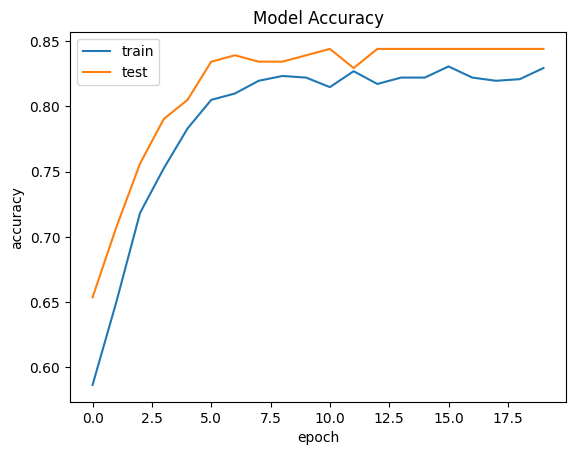

In [117]:
import matplotlib.pyplot as plt
#%matplotlib inline
# Model accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'])
plt.show()

In [ ]:
# Model Losss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'])
plt.show()

In [105]:
accuracy

[0.40286192297935486, 0.8341463208198547]

In [118]:
# generate classification report using predictions for binary model
from sklearn.metrics import classification_report, accuracy_score

model = np.round(model.predict(X_test)).astype(int)

print('Results for Binary Model')
print(accuracy_score(y_test, model))
print(classification_report(y_test, model))

7/7 [==============================] - 0s 2ms/step
Results for Binary Model
0.8439024390243902
              precision    recall  f1-score   support

           0       0.89      0.78      0.83       100
           1       0.81      0.90      0.86       105

    accuracy                           0.84       205
   macro avg       0.85      0.84      0.84       205
weighted avg       0.85      0.84      0.84       205



# Improving Results - A Binary Classification Problem

In [24]:
# convert into binary classification problem - heart disease or no heart disease
Y_train_binary = y_train.copy()
Y_test_binary = y_test.copy()

Y_train_binary[Y_train_binary > 0] = 1
Y_test_binary[Y_test_binary > 0] = 1

print(Y_train_binary[:20])
print(Y_test_binary[:20])

[0 0 0 1 1 0 0 1 1 0 1 1 0 0 0 1 0 1 1 0]
[0 1 0 1 0 0 1 0 1 1 0 1 0 0 1 0 0 0 0 1]


In [27]:
# define a new keras model for binary classification
def create_binary_model():
    # create model
    model = Sequential()
    model.add(Dense(16, input_dim=8, kernel_initializer='normal',  activation='relu'))
    model.add(Dropout(0.25))
    model.add(Dense(8, kernel_initializer='normal',  activation='relu'))
    model.add(Dropout(0.25))
    model.add(Dense(1, activation='sigmoid'))

    # Compile model
    adam = Adam(lr=0.001)
    model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
    return model

binary_model = create_binary_model()

print(binary_model.summary())

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 16)                144       
                                                                 
 dropout_4 (Dropout)         (None, 16)                0         
                                                                 
 dense_7 (Dense)             (None, 8)                 136       
                                                                 
 dropout_5 (Dropout)         (None, 8)                 0         
                                                                 
 dense_8 (Dense)             (None, 1)                 9         
                                                                 
Total params: 289 (1.13 KB)
Trainable params: 289 (1.13 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


In [28]:
# fit the model to the training data
#history=model.fit(X_train, Y_train, validation_data=(X_test, Y_test),epochs=50, batch_size=20)
history = binary_model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))
accuracy = binary_model.evaluate(X_test, Y_test_binary)
print("accuracy:", accuracy)

Epoch 1/20
26/26 [==============================] - 1s 9ms/step - loss: 0.6870 - accuracy: 0.6049 - val_loss: 0.6754 - val_accuracy: 0.7707
Epoch 2/20
26/26 [==============================] - 0s 3ms/step - loss: 0.6597 - accuracy: 0.7476 - val_loss: 0.6380 - val_accuracy: 0.8098
Epoch 3/20
26/26 [==============================] - 0s 3ms/step - loss: 0.6149 - accuracy: 0.7805 - val_loss: 0.5900 - val_accuracy: 0.8195
Epoch 4/20
26/26 [==============================] - 0s 5ms/step - loss: 0.5742 - accuracy: 0.7951 - val_loss: 0.5416 - val_accuracy: 0.8244
Epoch 5/20
26/26 [==============================] - 0s 5ms/step - loss: 0.5223 - accuracy: 0.8061 - val_loss: 0.4964 - val_accuracy: 0.8244
Epoch 6/20
26/26 [==============================] - 0s 5ms/step - loss: 0.4983 - accuracy: 0.8098 - val_loss: 0.4660 - val_accuracy: 0.8146
Epoch 7/20
26/26 [==============================] - 0s 5ms/step - loss: 0.4777 - accuracy: 0.8098 - val_loss: 0.4491 - val_accuracy: 0.8244
Epoch 8/20
26/26 [==

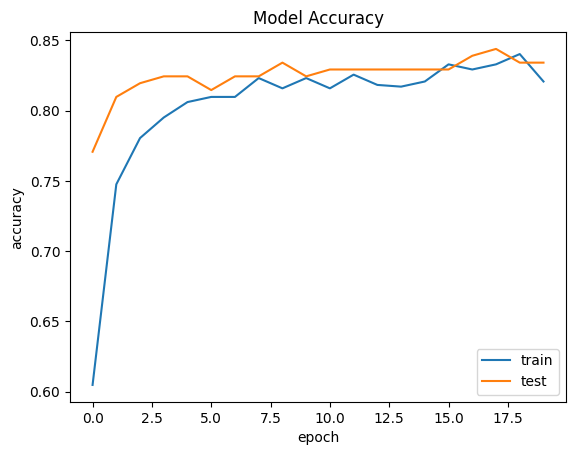

In [29]:
import matplotlib.pyplot as plt
#%matplotlib inline
# Model accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'])
plt.show()

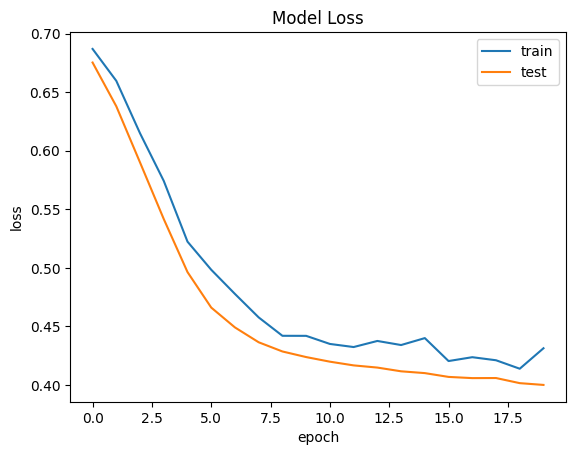

In [30]:
# Model Losss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'])
plt.show()

# result and matrix

In [ ]:
# generate classification report using predictions for categorical model
from sklearn.metrics import classification_report, accuracy_score

categorical_pred = np.argmax(model.predict(X_test), axis=1)

print('Results for Categorical Model')
print(accuracy_score(y_test, categorical_pred))
print(classification_report(y_test, categorical_pred))

In [32]:
# generate classification report using predictions for binary model
from sklearn.metrics import classification_report, accuracy_score

binary_pred = np.round(binary_model.predict(X_test)).astype(int)

print('Results for Binary Model')
print(accuracy_score(Y_test_binary, binary_pred))
print(classification_report(Y_test_binary, binary_pred))

7/7 [==============================] - 0s 2ms/step
Results for Binary Model
0.8341463414634146
              precision    recall  f1-score   support

           0       0.89      0.75      0.82       100
           1       0.79      0.91      0.85       105

    accuracy                           0.83       205
   macro avg       0.84      0.83      0.83       205
weighted avg       0.84      0.83      0.83       205

